## Part 0 - Define the Problem
### Boston Housing Prices
Let's say we are tasked to predict the housing prices in boston, as well as, some properties of the house.

You have no prior knowledge & experience in predicting housing prices. How should you go about doing it?

## Part 1 - Source Dataset
Before we can go to the meat of the problem, we first need to source the dataset.

**What that means is:**
1. Finding the data online (this case, we are using sklearn.datasets)
2. Importing that dataset into Python
3. Tranforming it into some data form / structure that we can use

In [ ]:
# Get dataset
from sklearn.datasets import load_boston

# To transform data to a dataframe
import pandas as pd

In [9]:
boston = load_boston()

print('Keys: \n', boston.keys(), '\n')
print('Shape of data: \n', boston.data.shape, '\n')
print('Feature names: \n', boston.feature_names, '\n')
print('Description: \n', boston.DESCR, '\n')

Keys: 
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename']) 

Shape of data: 
 (506, 13) 

Feature names: 
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 

Description: 
 .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built 

In [14]:
# Convert data to dataframe
# df stands for dataframe
df = pd.DataFrame(boston.data)

print(df.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [17]:
# Ops it seems like the headers are all missing
# Let's add it in
df.columns = boston.feature_names

print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [19]:
# Wait there's no columns for the PRICE of the house
# We need to add that in as well
df['PRICE'] = boston.target

print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


## Step 2 - Explore Dataset
After sourcing and preparing the dataset, we can now then proceed to data exploration, where we try to gain familarity of the data.

In [ ]:
# Data visualisation tools
import matplotlib.pyplot as plt
import seaborn as sns

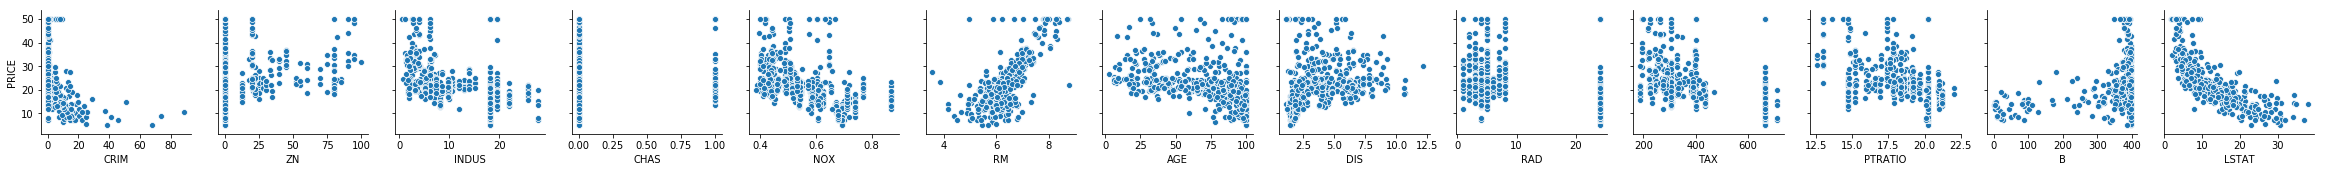

In [25]:
# Lets see an overview plot of the data
sns.pairplot(df, y_vars=['PRICE'], x_vars=boston.feature_names)
plt.show()

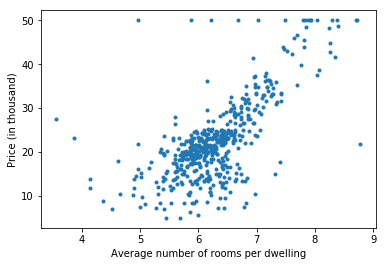

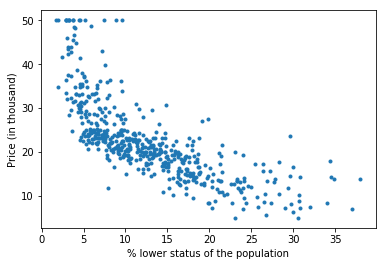

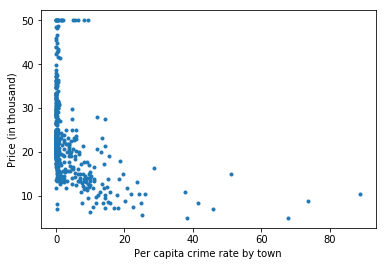

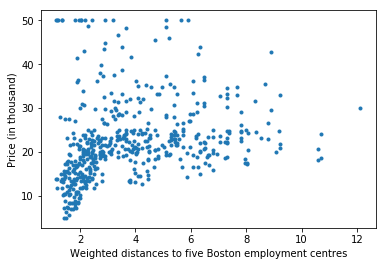

In [38]:
# It's quite small so let's plot it individually

# PRICE against RM
plt.plot(df.RM, df.PRICE, '.')   # '.' means plot >point< instead of >line<
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Price (in thousand)')
plt.show()

# PRICE against LSTAT
plt.plot(df.LSTAT, df.PRICE, '.')
plt.xlabel('% lower status of the population')
plt.ylabel('Price (in thousand)')
plt.show()

# PRICE against CRIM
plt.plot(df.CRIM, df.PRICE, '.') 
plt.xlabel('Per capita crime rate by town')
plt.ylabel('Price (in thousand)')
plt.show()

# PRICE against DIS
plt.plot(df.DIS, df.PRICE, '.')
plt.xlabel('Weighted distances to five Boston employment centres')
plt.ylabel('Price (in thousand)')
plt.show()

## Step 4, 5 & 6 - Train, Evaluate & Iterate.

In [61]:
import numpy as np
from sklearn.linear_model import LinearRegression

#### Price against Rooms (Linear Regression)

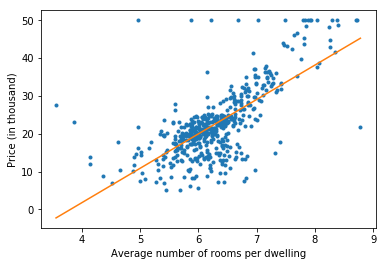

In [79]:
df = df.sort_values(['RM'])
X = df[['RM']]
y = df['PRICE']

reg = LinearRegression()
reg.fit(X, y)
y_new = reg.predict(X)

plt.plot(df.RM, df.PRICE, '.')
plt.plot(X, y_new)

plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Price (in thousand)')
plt.show()

#### Price against Rooms (Polynomial Regression)

In [64]:
from sklearn.preprocessing import PolynomialFeatures

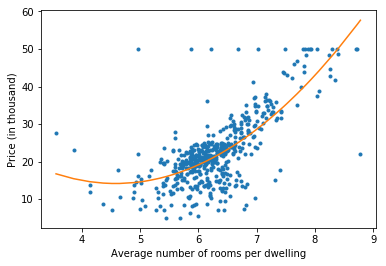

In [86]:
df = df.sort_values(['RM'])
X = df[['RM']]
y = df['PRICE']

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

reg = LinearRegression()
reg.fit(X_poly, y)
y_new = reg.predict(X_poly)

plt.plot(df.RM, df.PRICE, '.')
plt.plot(X, y_new)

plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Price (in thousand)')
plt.show()

This is a better representation of the data, don't you think?
However, what if we try adjusting our model to a higher degree?

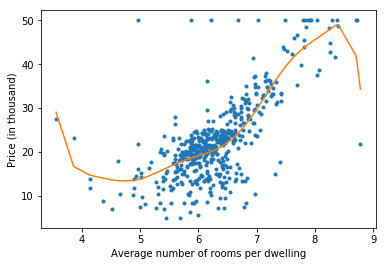

In [134]:
df = df.sort_values(['RM'])
X = df[['RM']]
y = df['PRICE']

poly_features = PolynomialFeatures(degree=10)
X_poly = poly_features.fit_transform(X)

reg = LinearRegression()
reg.fit(X_poly, y)
y_new = reg.predict(X_poly)

plt.plot(df.RM, df.PRICE, '.')
plt.plot(X, y_new)

plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Price (in thousand)')
plt.show()

This is a poorer representation of the data. By setting the polynomial degree too high, our model has overfitted.

So how do we test our model?
We split our data into train set and test set.
Train set is used to train our model while test set is used to test our model.

#### Split Test Train

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [129]:
df = df.sort_values(['RM'])
X = df[['RM']]
y = df['PRICE']

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
# print(reg.score(X_test, y_test))
y_pred = reg.predict(X_test)
print('Mean Squared Error of Degree 2:', mean_squared_error(y_test, y_pred))

Mean Squared Error of Degree 2: 34.19867490520905


In [130]:
df = df.sort_values(['RM'])
X = df[['RM']]
y = df['PRICE']

for i in range(1, 10):
    poly_features = PolynomialFeatures(degree=i)
    X_poly = poly_features.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    reg = LinearRegression()
    reg.fit(X_train, y_train)
    # print(reg.score(X_test, y_test))
    y_pred = reg.predict(X_test)
    print(f'Mean Squared Error of Degree {i}:', mean_squared_error(y_test, y_pred))

Mean Squared Error of Degree 1: 46.00292195870418
Mean Squared Error of Degree 2: 34.21575901377558
Mean Squared Error of Degree 3: 31.94966857110479
Mean Squared Error of Degree 4: 36.86031511263249
Mean Squared Error of Degree 5: 31.05132183481206
Mean Squared Error of Degree 6: 33.61209797812089
Mean Squared Error of Degree 7: 37.40513113484617
Mean Squared Error of Degree 8: 32.44202835883172
Mean Squared Error of Degree 9: 315.86882051137223


#### Regularisation

In [135]:
from sklearn.linear_model import Ridge

In [141]:
df = df.sort_values(['RM'])
X = df[['RM']]
y = df['PRICE']

poly_features = PolynomialFeatures(degree=10)
X_poly = poly_features.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

reg = Ridge()
reg.fit(X_train, y_train)
# print(reg.score(X_test, y_test))
y_pred = reg.predict(X_test)

print('Mean Squared Error of Degree 10:', mean_squared_error(y_test, y_pred))

Mean Squared Error of Degree 10: 30.787968505582374


c:\users\yanhw\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.03308e-20): result may not be accurate.
  overwrite_a=True).T


### Your turn now

1. Implement a suitable model to predict the housing prices based on: LSTAT, CRIM & DIS.
2. Calculate the score of the model using split test train.

#### Price against LSTAT

#### Price against CRIM

#### Price against DIS